In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets  import make_blobs
from sklearn.metrics import log_loss, accuracy_score
from sklearn.datasets import make_circles
from tqdm import tqdm

In [2]:
def initialisation(n0,n1,n2):
    W1= np.random.randn(n1,n0)
    b1= np.random.randn(n1,1)
    
    W2=np.random.randn(n2,n1)
    b2=np.random.randn(n2,1)
    
    parameters={
        "W1":W1,
        "W2":W2,
        "b1":b1,
        "b2":b2      
    }
    
    return parameters
    

In [3]:
def forward_propagation(x, parameters):
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    Z1= W1.dot(x)+b1
    A1=1/(1+np.exp(-Z1))
    
    Z2=W2.dot(A1)+b2
    A2=1/(1+np.exp(-Z2))
    
    activations={
        "A1":A1,
        "A2":A2
    }
    return activations
    

In [4]:
def back_propagation(x,y,parameters, activations):
    A1=activations["A1"]
    A2=activations["A2"]
    W2=parameters["W2"]
    m=y.shape[1]
    
    #back_propagation couche 2
    dZ2=A2-y
    dW2=(1/m)*dZ2.dot(A1.T)
    db2=(1/m)*np.sum(dZ2, axis=1,keepdims=True)
    
    #back_propagation couche 1
    dZ1=np.dot(W2.T, dZ2)*A1*(1-A1)
    dW1=(1/m)*dZ1.dot(x.T)
    db1=(1/m)*np.sum(dZ1, axis=1,keepdims=True)
    
    gradients={
        "dW1":dW1,
        "db1":db1,
        "dW2":dW2,
        "db2":db2
        
    }
    return gradients
    

In [5]:
def update(gradients, parameters, learning_rate):
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    dW1=gradients["dW1"]
    db1=gradients["db1"]
    dW2=gradients["dW2"]
    db2=gradients["db2"]
    
    W2=W2-learning_rate*dW2
    W1=W1-learning_rate*dW1
    b2=b2-learning_rate*db2
    b1=b1-learning_rate*db1
    
    parameters={
        "W1":W1,
        "b1":b1,
        
        "W2":W2,
        "b2":b2      
    }
    
    return parameters
    

In [6]:
def predict(x, parameters):
    activations= forward_propagation(x, parameters)
    A2=activations["A2"]
    return A2>=0.5

In [7]:

# neurone artificiel a n couches
def neural_network(x_train,y_train,x_test, y_test, n1, learning_rate=0.1, n_iter=1000 ):
    n0=x_train.shape[0]
    n2=y_train.shape[0]
    parametres= initialisation(n0,n1,n2)
    
    train_loss=[]
    train_acc=[]
    test_acc=[]
    test_loss=[]
    
    for i in tqdm(range(n_iter)):
        activations= forward_propagation(x_train,parametres)
        gradients= back_propagation(x_train,y_train, parametres,activations)
        parametres= update(gradients, parametres, learning_rate)
        
        if i % 10 == 0:
            #train
            train_loss.append(log_loss(y_train,activations["A2"]))
            y_pred=predict(x_train,parametres)
            current_accuracy=accuracy_score(y_train.flatten(), y_pred.flatten())
            train_acc.append(current_accuracy)
            
            #test
            activations_test= forward_propagation(x_test,parametres)
            test_loss.append(log_loss(y_test,activations_test["A2"]))
            y_pred=predict(x_test,parametres)
            current_accuracy=accuracy_score(y_test.flatten(), y_pred.flatten())
            test_acc.append(current_accuracy)
            
            
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.plot(train_loss, label="train_loss")
    plt.plot(test_loss,label="test_loss")
    plt.legend()
    
    plt.subplot(1,3,2)
    plt.plot(train_acc, label="train_acc")
    plt.legend()
    
    plt.subplot(1,3,3)
    plt.plot(train_acc, label="train_acc")
    plt.plot(test_acc, label="test_acc")
    plt.legend()
    print(train_acc[-1])
    print(test_acc[-1])
    
    return parametres


dimensssion de x: (2, 100)
dimenssion de y: (1, 100)


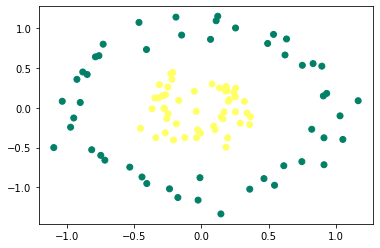

In [8]:
x,y=make_circles(n_samples=100, noise=0.1, factor=0.3 , random_state=0)
x=x.T
y=y.reshape(1,y.shape[0])

print("dimensssion de x:",x.shape)
print("dimenssion de y:",y.shape)

plt.scatter(x[0,:],x[1,:], c=y, cmap="summer")

100%|██████████| 10000/10000 [00:01<00:00, 5145.46it/s]


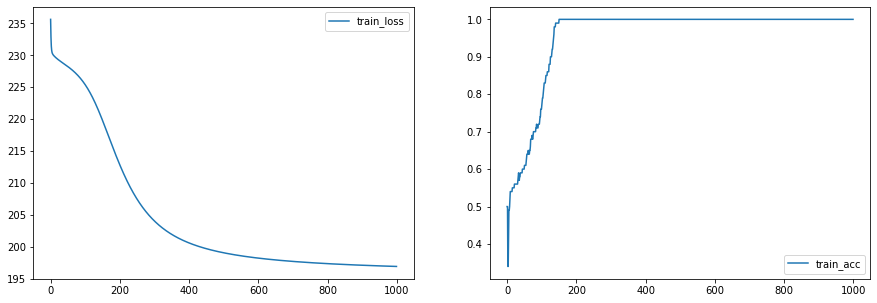

In [ ]:
# chargement du dataset

In [9]:
from utilities import*

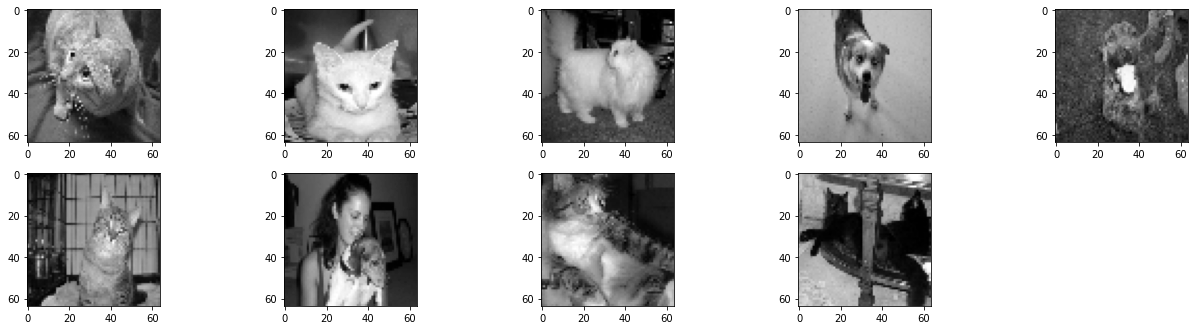

In [10]:
x_train , y_train, x_test, y_test= load_data()
    
plt.figure(figsize=(18,9))
for i in range(1,10):
    plt.subplot(4,5,i)
    plt.imshow(x_train[i], cmap="gray")
    plt.tight_layout()

In [11]:
y_train= y_train.T
y_test=y_test.T

x_train=x_train.T
x_train_reshape=x_train.reshape(-1, x_train.shape[-1])/ x_train.max()

x_test= x_test.T
x_test_reshape= x_test.reshape(-1, x_test.shape[-1])/x_train.max()

m_train=500
m_test=80
x_test_reshape= x_test_reshape[:,:m_test]
x_train_reshape= x_train_reshape[:,:m_train]
y_train= y_train[:,:m_train]
y_test= y_test[:,:m_test]

print(x_train_reshape.shape)
print(y_train.shape)
print(x_test_reshape.shape)
print(y_test.shape)




(4096, 500)
(1, 500)
(4096, 80)
(1, 80)


100%|██████████| 1000/1000 [00:37<00:00, 26.96it/s]


0.57
0.4375


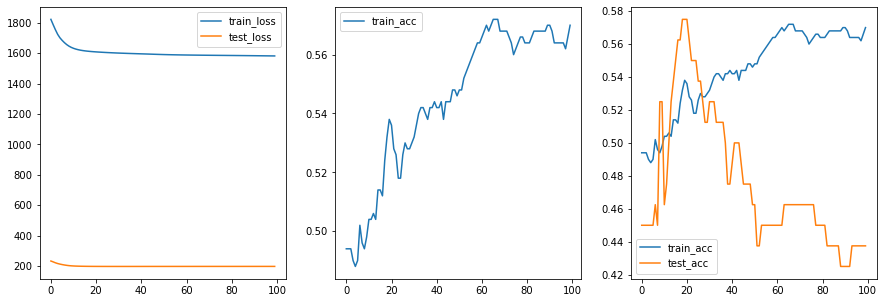

In [20]:
# instanciation d'un reseau a 32 couches on constate un overfiting .
# le nombre eleve de couche n'induit pas un meilleure apprentissage
parametre1= neural_network(x_train_reshape, y_train, x_test_reshape, y_test, n1=32, learning_rate=0.01,n_iter=1000)

In [ ]:
# on a juste utiliser deux couches c est pourquoi l'apprentissage est minime .
# pour corriger cela on pourrait envisager d'utiliser un reseau a n couches(n>8) 